In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Riscaldamento di una Stanza

**Vogliamo riscaldare una stanza con un convettore**

* Il convettore riscalda l'aria, che sua volta riscalda i muri
* ...Che disperdono parte del calore verso l'esterno

Sappiamo che:

* La temperature del convettore e dell'esterno sono costanti
* L'aria della stanza ed i muri hanno capacità termiche non trascurabili

**Possiamo modellare il sistema utilizzando un _circuito RC equivalente_:**

<center>
<img src="assets/heating3.png" width=70%/>
</center>

## Esercizio: Riscaldamento di una Stanza

**La modellazione a circuiti RC equivalenti**

...E un "trucco" per rappresentare sistemi fisici in modo uniforme

<center>
<img src="assets/heating3.png" width=70%/>
</center>

* Si basa sul fatto che molti fenomeni fisici, pur essendo molto diversi
* ...Sono descritti più o meno dalle stesse formule
* ...E possono essere ricondotti ad un sistema di riferimento

**Tipicamente, come sistema di riferimento si sceglie un circuito elettrico**

Questa rappresentazione vi diventerà molto familiare l'anno prossimo!

## Esercizio: Riscaldamento di una Stanza

**La modellazione a circuiti RC equivalenti**

...E un "trucco" per rappresentare sistemi fisici in modo uniforme

<center>
<img src="assets/heating3.png" width=70%/>
</center>

**I cerchi con +/-**

...Rappresentano una _differenza di temperatura (tensione) costante_

* Nel nostro caso abbimo $T_c$ (la temperatura del convettore)
* ...E $T_o$ (la temperatura dell'ambiente esterno)

**I valori $w_{ca}, w_{aw}, w_{wo}$**

...Rappresentano _flussi di calore (corrente)_

## Esercizio: Riscaldamento di una Stanza

**La modellazione a circuiti RC equivalenti**

...E un "trucco" per rappresentare sistemi fisici in modo uniforme

<center>
<img src="assets/heating3.png" width=70%/>
</center>

**I simboli a zig-zag**

...Rappresentano una _resistenza termica (elettrica)_

* Sono descritti da una equazione del tipo:
$$
T_0 - T_1 = R_{0,1} w_{0,1}
$$

## Esercizio: Riscaldamento di una Stanza

**La modellazione a circuiti RC equivalenti**

...E un "trucco" per rappresentare sistemi fisici in modo uniforme

<center>
<img src="assets/heating3.png" width=70%/>
</center>

**I simboli con due sbarre**

...Rappresentano una _capacità termica (elettrica)_

* Sono descritti da una equazione _differenziale_ del tipo:
$$
\frac{dT}{dt} = \frac{1}{C} w
$$
* Dove $w$ è il calore (corrente) netto in entrata

## Esercizio: Riscaldamento di una Stanza

**Nel complesso, per il nostro circuito abbiamo:**

$$
\left(\begin{array}{c}
\dot{T_a} \\
\dot{T_w}
\end{array}\right)
=
\left(\begin{array}{c}
\frac{1}{C_a} (w_{ca} - w_{aq}) \\
\frac{1}{C_w} (w_{aw} - w_{wo})
\end{array}\right)
$$

Con:


$$\begin{align}
& w_{ca} = \frac{1}{R_{ca}} (T_c - T_a) \\
& w_{aw} = \frac{1}{R_{aw}} (T_a - T_w) \\
& w_{wo} = \frac{1}{R_{wo}} (T_w - T_o) \\
\end{align}$$

## Esercizio: Riscaldamento di una Stanza

**Prima di tutto, procediamo a caricare i dati del problema**

Potete farlo usando la cella seguente:

In [2]:
# Un po' di dati intermedi
g = 9.81
vA = 62 # Volume dell'aria
vW = 0.25 * 16 * 2.7 # Volume dei muri
mA = 1.225 * vA / g # Massa dell'aria
mW = 1050 * vW / g # Massa dei muri

# I veri e propri dati del problema
Ca = 1005 * mA # Capacita' termica dell'aria
Cw = 1000 * mW # Capacita' termica dei muri
Rca = 0.35 # Resisitivita' termica convettore-aria
Raw = 0.5 # Resistivita' termica aria-muro
Rwo = 3.0 # Resistivita' termica muro-esterno
Tc = 23 # Temperatura del convettore
To = 15 # Temperatura esterna

Ta0 = 19.5 # Temperatura iniziale dell'aria
Tw0 = 19.5 # Temperatura iniziale delle pareti

## Esercizio: Riscaldamento di una Stanza

**Nel modulo `sol.heating` si definisca una classe:**

```python
class Dstate:
    def __init__(self, Ca, Cw, Rca, Raw, Rwo, Tc, To):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato iniziale $(T_{a,0}, T_{w,0}) = (19.5, 19.5)$ ed il tempo iniziale $t_0 = 0$

In [5]:
from sol import heating
import numpy as np

X0 = np.array([Ta0, Tw0])
t0 = 0

dstate = heating.Dstate(Ca, Cw, Rca, Raw, Rwo, Tc, To)
dstate(X=X0, t=t0)

array([ 1.28521317e-03, -1.29761905e-06])

## Esercizio: Riscaldamento di una Stanza

**Nel modulo `sol.heating` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento della stanza

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `base.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento della stanza**

* Per un periodo di 2 ore
* ...A partire dallo stato iniziale $(T_a, T_w) = (19.5, 19.5)$

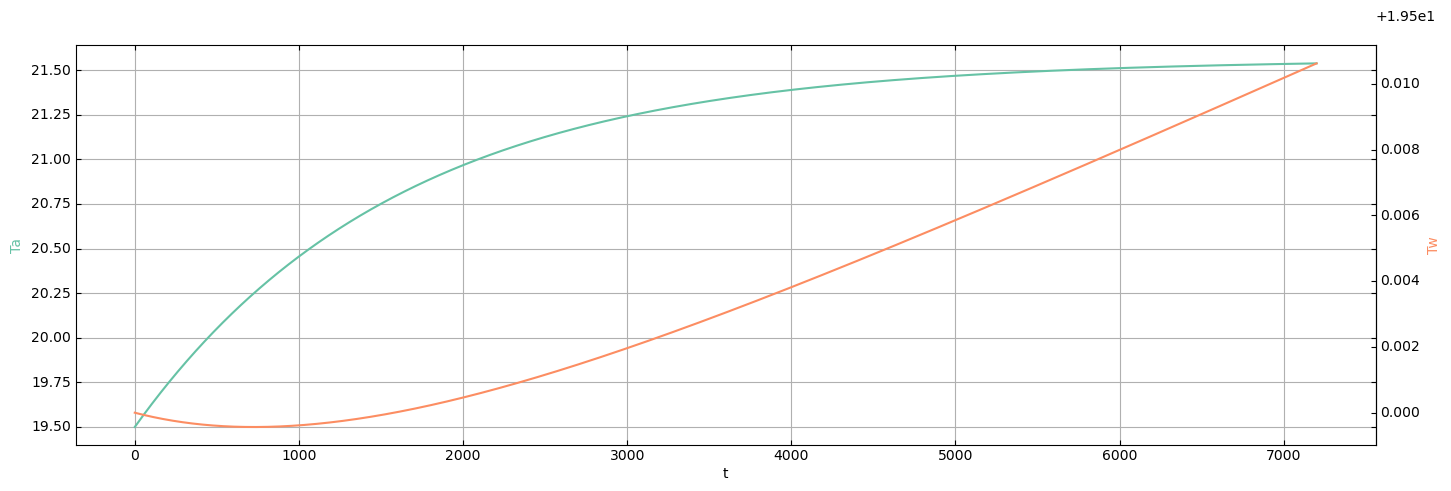

In [8]:
from scipy.integrate import odeint

X0 = np.array([Ta0, Tw0])
t = np.linspace(0, 3600 * 2, 3600 * 2)

X, t = heating.simulate(dstate, X0, t)

## Esercizio: Riscaldamento di una Stanza

**Nel modulo `sol.heating` si definisca una funzione:**

```python
def final_temp(X, t)
```

* Che restituisca in una tupla (nell'ordine)
* ...La temperatura finale dell'aria e dei muri

Si stampino a video i valori

In [9]:
Taf, Taw = heating.final_temp(X, t)
print(f'Ta finale: {Taf}, Tw finle: {Taw}')

Ta finale: 21.538848670141626, Tw finle: 19.510618628151132


## Esercizio: Riscaldamento di una Stanza

**Nel modulo `sol.heating` si definisca una funzione:**

```python
def temp_in_1h(X, t)
```

* Che restituisca in una tupla (nell'ordine)
* ...La temperatura raggiunta dell'aria e dei muri in un'ora

Si stampino a video i valori

In [10]:
Ta1h, Tw1h = heating.temp_in_1h(X, t)
print(f'Ta in 1h: {Ta1h}, Tw in 1h: {Tw1h}')

Ta in 1h: 21.341713017592742, Tw in 1h: 19.503044605859536


## Esercizio: Riscaldamento di una Stanza

**Nel modulo `sol.heating` si definisca una funzione:**

```python
def time_to_20C(X, t)
```

* Che restituisca il tempo necessario
* ...Perché la temperatura dell'aria raggiunga i 20 gradi

Si stampi a video il valore

In [11]:
t20C = heating.time_to_20C(X, t)
print(f'Tempo per arrivare a 20°C: {t20C}')

Tempo per arrivare a 20°C: 445.6860501105812
